In [2]:
import numpy as np
import pandas as pd
import os
from random import choice
import matplotlib.pyplot as plt

In [3]:
files_npy = os.listdir('./npy')
file_npy = choice(files_npy)

In [4]:
def pad_len(start_len, end_len):
    n_zeros = end_len - start_len
    first = n_zeros // 2
    second = first + n_zeros % 2
    return first, second

In [6]:
max_shape_list = []

for file_npy in files_npy:
    with open('./npy/' + file_npy, 'rb') as f:
        channeles = np.load(f)
    max_shape_list.append(np.max(list(channeles.shape)))
    f.close()
        

df_max_shape = pd.DataFrame(list(zip(files_npy, max_shape_list)),
                            columns =['Filename', 'Max_shape'])

In [7]:
max_shape_list = sorted(list(df_max_shape['Max_shape']))
L = np.max(max_shape_list)

C:\Users\alexh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

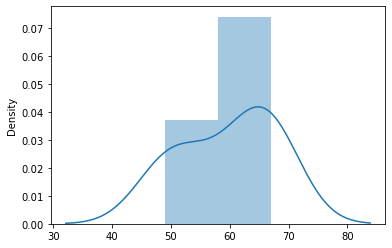

In [40]:
import seaborn as sns

sns.distplot(max_shape_list)

In [10]:
for file_npy in files_npy:
    
    with open('./npy/' + file_npy, 'rb') as f:
        channeles = np.load(f)
    f.close()
    
    
    for ch in channeles:
    
        x_1, x_2 = pad_len(ch.shape[0], L)
        y_1, y_2 = pad_len(ch.shape[1], L)
        z_1, z_2 = pad_len(ch.shape[2], L)

        ch_new.append(np.pad(ch, ((x_1, x_2), (y_1, y_2), (z_1, z_2)), 'constant'))

    np.save('./data/' + file_npy, ch_new)

{(8, 16, 32): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1edbd140f10>,
 (8, 16, 35): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1edcae28a30>,
 (8, 17, 31): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1edcae28ca0>,
 (8, 17, 36): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1edcae28f40>,
 (8, 18, 30): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1edbeb12220>,
 (8, 18, 36): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1edbeb124c0>,
 (8, 19, 30): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1edbeb12760>,
 (8, 19, 37): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1edbeb12a00>,
 (8, 20, 30): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1edbeb12ca0>,
 (8, 20, 38): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1edbeb12f40>,
 (8, 21, 30): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1edbfec0220>,
 (8, 21, 38): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x1edbfec04c0>,
 (8, 22, 30): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x

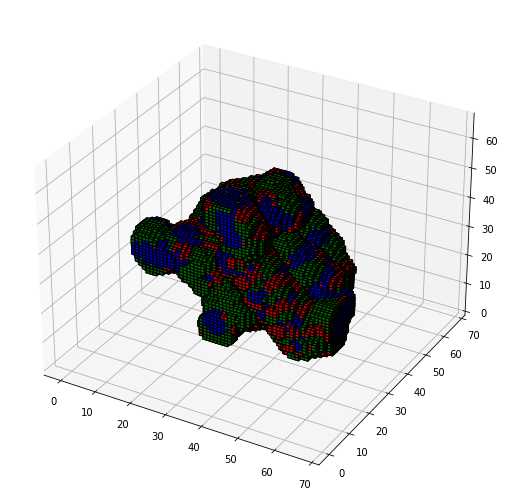

In [11]:
fig = plt.figure(figsize=(9, 9))
ax = fig.gca(projection='3d')
ax.voxels(ch_new[0], facecolors='r', edgecolor='k')
ax.voxels(ch_new[1], facecolors='g', edgecolor='k')       
ax.voxels(ch_new[2], facecolors='b', edgecolor='k')